In [88]:
import tensorflow as tf
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [89]:
test=pd.read_csv('//content/sample_data/california_housing_test.csv')
train=pd.read_csv('/content/sample_data/california_housing_train.csv')
#train,test=sk.model_selection.train_test_split(data,test_size=0.2)


In [115]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [116]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [117]:
x_train=train.iloc[:,1:]
y_train=pd.cut(train.iloc[:, 0], bins=10, labels=False)
x_test=test.iloc[:,1:]
y_test=pd.cut(test.iloc[:, 0], bins=10, labels=False)

In [118]:
k = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1847 - loss: 2098.7383 - val_accuracy: 0.3193 - val_loss: 563.6492
Epoch 2/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1984 - loss: 398.8531 - val_accuracy: 0.3193 - val_loss: 309.4973
Epoch 3/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1962 - loss: 184.2997 - val_accuracy: 0.2293 - val_loss: 111.0296
Epoch 4/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1954 - loss: 89.3745 - val_accuracy: 0.1753 - val_loss: 96.6105
Epoch 5/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1852 - loss: 65.4144 - val_accuracy: 0.3250 - val_loss: 33.3407
Epoch 6/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2040 - loss: 35.2859 - val_accuracy: 0.3197 - val_loss: 20.6259
Epoch 7/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2123 - loss: 18.8440 - val_accuracy: 0.2020 - val_loss: 17.8821
Epoch 8/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2210 - loss: 14.2

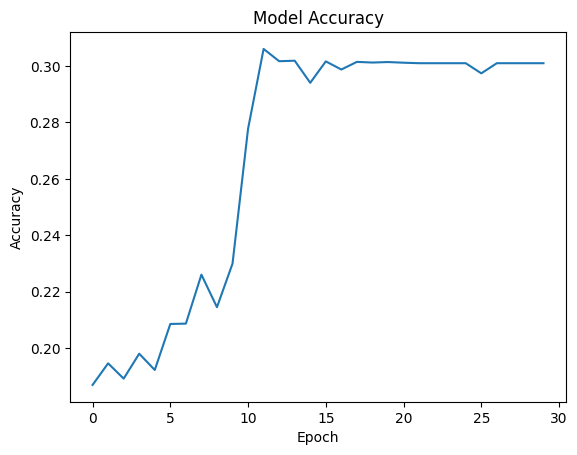

In [122]:
plt.plot(k.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [123]:
pred=model.predict(x_test,)
pred_class=np.argmax(pred,axis=1)
print(pred_class)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[6 6 6 ... 6 6 6]


In [124]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)
print("The accuracy is: "+str(test_acc*100)+" %")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3191 - loss: 1.8647
0.31933334469795227
The accuracy is: 31.933334469795227 %
